In [14]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input, Reshape
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train / 255.
x_test = x_test / 255.

In [4]:
x_train = x_train.reshape(*x_train.shape, 1)
x_test = x_test.reshape(*x_test.shape, 1)

In [10]:
encoding_size = 30


def create_encoder():
  input_ = Input(shape=(28, 28, 1))
  flat = Flatten()(input_)
  encoder = Dense(encoding_size, activation="relu")(flat)
  return input_, encoder


def create_decoder():
  input_ = Input(shape=(encoding_size,))
  flat = Dense(28*28, activation=("sigmoid"))(input_)
  decoder = Reshape((28, 28, 1))(flat)
  return input_, decoder

In [12]:
encoder_input, encoder = create_encoder()
print(encoder)

KerasTensor(type_spec=TensorSpec(shape=(None, 30), dtype=tf.float32, name=None), name='dense_3/Relu:0', description="created by layer 'dense_3'")


In [13]:
decoder_input, decoder = create_decoder()
print(decoder)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), name='reshape_1/Reshape:0', description="created by layer 'reshape_1'")


In [15]:
decoder_model = Model(decoder_input, decoder, name="decoder")
decoder_model.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_4 (Dense)             (None, 784)               24304     
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 24,304
Trainable params: 24,304
Non-trainable params: 0
_________________________________________________________________


In [16]:
encoder_model = Model(encoder_input, encoder, name="encoder")
encoder_model.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 30)                23550     
                                                                 
Total params: 23,550
Trainable params: 23,550
Non-trainable params: 0
_________________________________________________________________


In [22]:
autoencoder = Model(encoder_input, decoder_model(encoder_model(encoder_input)), name="autoencoder")

In [18]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 30)                23550     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         24304     
                                                                 
Total params: 47,854
Trainable params: 47,854
Non-trainable params: 0
_________________________________________________________________


In [23]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [24]:
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 7s 27ms/step - loss: 0.0950 - val_loss: 0.0939
Epoch 2/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0950 - val_loss: 0.0939
Epoch 3/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0950 - val_loss: 0.0939
Epoch 4/20
235/235 [==============================] - 5s 22ms/step - loss: 0.0950 - val_loss: 0.0938
Epoch 5/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0949 - val_loss: 0.0938
Epoch 6/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0949 - val_loss: 0.0938
Epoch 7/20
235/235 [==============================] - 6s 27ms/step - loss: 0.0949 - val_loss: 0.0938
Epoch 8/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0949 - val_loss: 0.0939
Epoch 9/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0949 - val_loss: 0.0938
Epoch 10/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0949 - val_lo

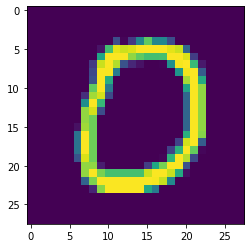

In [32]:
img = x_test[10]
plt.imshow(img)

In [33]:
output = encoder_model.predict(img.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 26ms/step


In [34]:
print(output)

[[ 1.8002025 11.842499   5.2312436 11.243967  12.114241   2.3551216
   7.1822023  1.1915796  4.8318715  4.879629   9.933222   2.923951
   4.9371724  6.416211   5.601227   3.4550238  9.947088   8.63537
   9.105778   8.239377   5.6944027  5.300208   6.7979383  4.9018426
   4.6339245 12.1347065 11.009644  12.039919  12.119936  11.58219  ]]


1/1 [==============================] - 0s 25ms/step


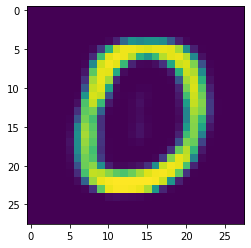

In [35]:
img_restored = decoder_model.predict(output)
plt.imshow(img_restored[0])